## ETL

Firstly, data is uploaded

In [61]:
import pandas as pd 
import numpy as np 
import matplotlib.pyplot as plt  
import seaborn as sns 
import xgboost as xgb
from imblearn.over_sampling import SMOTE
from scipy.stats import uniform, randint
from sklearn.model_selection import train_test_split
from imblearn.under_sampling import RandomUnderSampler
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split, GridSearchCV, RandomizedSearchCV
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report, roc_auc_score, auc, roc_curve
from sklearn.ensemble import RandomForestClassifier
from sklearn.impute import SimpleImputer
from matplotlib.colors import ListedColormap

In [3]:
df = pd.read_csv(r"cs-training.csv")

In [4]:
df.head()

,Unnamed: 0,SeriousDlqin2yrs,RevolvingUtilizationOfUnsecuredLines,age,NumberOfTime30-59DaysPastDueNotWorse,DebtRatio,MonthlyIncome,NumberOfOpenCreditLinesAndLoans,NumberOfTimes90DaysLate,NumberRealEstateLoansOrLines,NumberOfTime60-89DaysPastDueNotWorse,NumberOfDependents
0,1,1,0.766127,45,2,0.802982,9120.0,13,0,6,0,2.0
1,2,0,0.957151,40,0,0.121876,2600.0,4,0,0,0,1.0
2,3,0,0.658180,38,1,0.085113,3042.0,2,1,0,0,0.0
3,4,0,0.233810,30,0,0.036050,3300.0,5,0,0,0,0.0
4,5,0,0.907239,49,1,0.024926,63588.0,7,0,1,0,0.0


First column is deleted.

In [5]:
df = df.drop(columns=["Unnamed: 0"])

# EDA (Exploratory Data Analysis)
Next, I will perform a descriptive statistical analysis to get an accurate grasp about the data

In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 150000 entries, 0 to 149999
Data columns (total 11 columns):
 #   Column                                Non-Null Count   Dtype  
---  ------                                --------------   -----  
 0   SeriousDlqin2yrs                      150000 non-null  int64  
 1   RevolvingUtilizationOfUnsecuredLines  150000 non-null  float64
 2   age                                   150000 non-null  int64  
 3   NumberOfTime30-59DaysPastDueNotWorse  150000 non-null  int64  
 4   DebtRatio                             150000 non-null  float64
 5   MonthlyIncome                         120269 non-null  float64
 6   NumberOfOpenCreditLinesAndLoans       150000 non-null  int64  
 7   NumberOfTimes90DaysLate               150000 non-null  int64  
 8   NumberRealEstateLoansOrLines          150000 non-null  int64  
 9   NumberOfTime60-89DaysPastDueNotWorse  150000 non-null  int64  
 10  NumberOfDependents                    146076 non-null  float64
dtype

Next, I check null values in every column

In [7]:
null_percentage = {}
for column in df.columns:
    null_percentage[column] = (df[column].isnull().sum() / len(df))*100
null_percentage

{'SeriousDlqin2yrs': 0.0,
 'RevolvingUtilizationOfUnsecuredLines': 0.0,
 'age': 0.0,
 'NumberOfTime30-59DaysPastDueNotWorse': 0.0,
 'DebtRatio': 0.0,
 'MonthlyIncome': 19.820666666666668,
 'NumberOfOpenCreditLinesAndLoans': 0.0,
 'NumberOfTimes90DaysLate': 0.0,
 'NumberRealEstateLoansOrLines': 0.0,
 'NumberOfTime60-89DaysPastDueNotWorse': 0.0,
 'NumberOfDependents': 2.616}

I see that there is a slight proportion of NaN in the column 'NumberOfDependents'. I will check it to see if there is any way to replace those null values.

In [8]:
df['NumberOfDependents'].isnull().sum()

3924

Next, we can observe a quick descriptive statistical analysis

In [9]:
df['NumberOfDependents'].describe()

count    146076.000000
mean          0.757222
std           1.115086
min           0.000000
25%           0.000000
50%           0.000000
75%           1.000000
max          20.000000
Name: NumberOfDependents, dtype: float64

I'm interested in seeing the data distribution to figure out which input function I might apply.

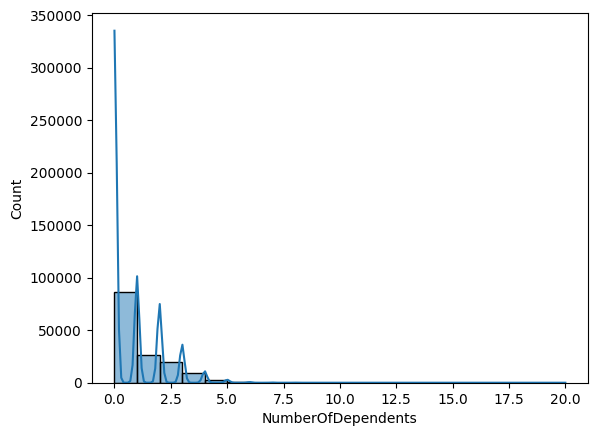

In [10]:
sns.histplot(df["NumberOfDependents"].dropna(), bins = 20, kde = True)
plt.show()

Since the media is higher than the median we can infer that the distribution has a bias. Also, the median is 0 and the max_value is 20. That is a strong sign of outliers. Since as input measure I will use 'median'.

In [11]:
df['NumberOfDependents'].fillna(df['NumberOfDependents'].median(), inplace=True)

C:\Users\Cristian\AppData\Local\Temp\ipykernel_192\3802992407.py:1: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df['NumberOfDependents'].fillna(df['NumberOfDependents'].median(), inplace=True)


Let's check again the number of NaN

In [12]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 150000 entries, 0 to 149999
Data columns (total 11 columns):
 #   Column                                Non-Null Count   Dtype  
---  ------                                --------------   -----  
 0   SeriousDlqin2yrs                      150000 non-null  int64  
 1   RevolvingUtilizationOfUnsecuredLines  150000 non-null  float64
 2   age                                   150000 non-null  int64  
 3   NumberOfTime30-59DaysPastDueNotWorse  150000 non-null  int64  
 4   DebtRatio                             150000 non-null  float64
 5   MonthlyIncome                         120269 non-null  float64
 6   NumberOfOpenCreditLinesAndLoans       150000 non-null  int64  
 7   NumberOfTimes90DaysLate               150000 non-null  int64  
 8   NumberRealEstateLoansOrLines          150000 non-null  int64  
 9   NumberOfTime60-89DaysPastDueNotWorse  150000 non-null  int64  
 10  NumberOfDependents                    150000 non-null  float64
dtype

I will rename the columns in order to make them easier to grasp.

In [13]:
df.rename(columns={
    'SeriousDlqin2yrs': 'Serious_Delinquency_2Yrs',
    'RevolvingUtilizationOfUnsecuredLines': 'Credit_Utilization_Rate',
    'age': 'Age',
    'NumberOfTime30-59DaysPastDueNotWorse': 'Times_30_59_Days_Late',
    'DebtRatio': 'Debt_To_Income_Ratio',
    'MonthlyIncome': 'Monthly_Income',
    'NumberOfOpenCreditLinesAndLoans': 'Open_Credit_Lines_And_Loans',
    'NumberOfTimes90DaysLate': 'Times_90_Days_Late',
    'NumberRealEstateLoansOrLines': 'Real_Estate_Loans',
    'NumberOfTime60-89DaysPastDueNotWorse': 'Times_60_89_Days_Late',
    'NumberOfDependents': 'Dependents'
}, inplace=True)


I will turn the Target Variable into a Categoric one.

In [14]:
df["Serious_Delinquency_2Yrs"] = df["Serious_Delinquency_2Yrs"].astype("category")

In [15]:
print(df["Serious_Delinquency_2Yrs"].dtype)  # Muestra el tipo de dato
print(df["Serious_Delinquency_2Yrs"].unique())  # Verifica los valores únicos

category
[1, 0]
Categories (2, int64): [0, 1]


I will continue doing an EDA

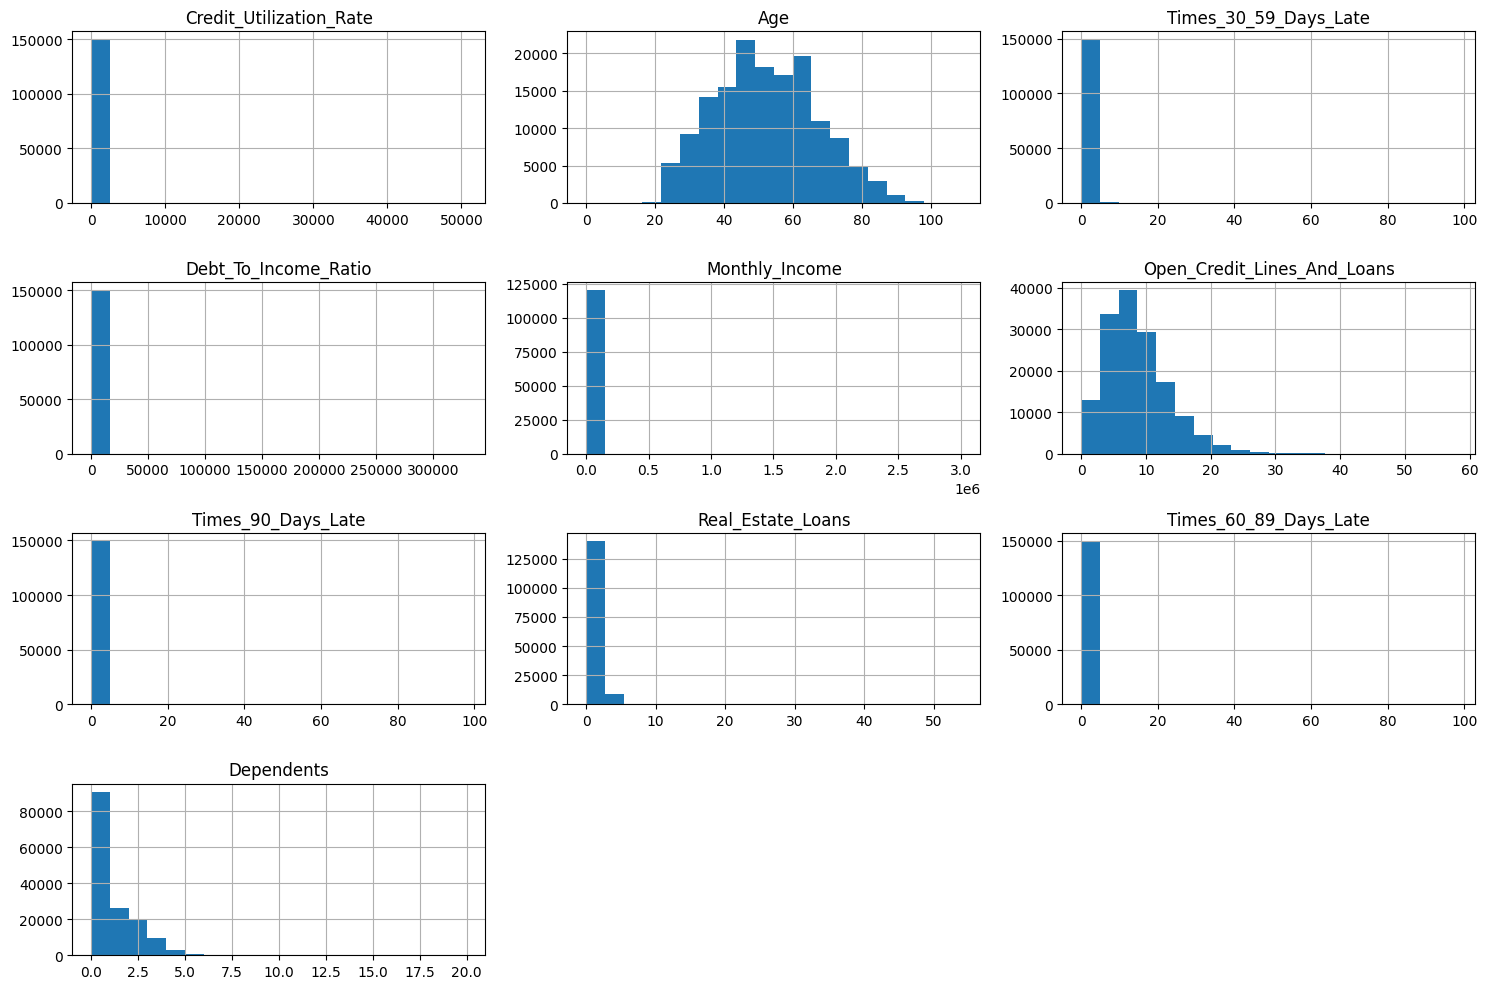

In [16]:
df.hist(bins=20, figsize=(15, 10))
plt.tight_layout()
plt.show()

I will analyze correlation to identify which variables could be ideal for my analysis.

In [17]:
corr = df.corr()

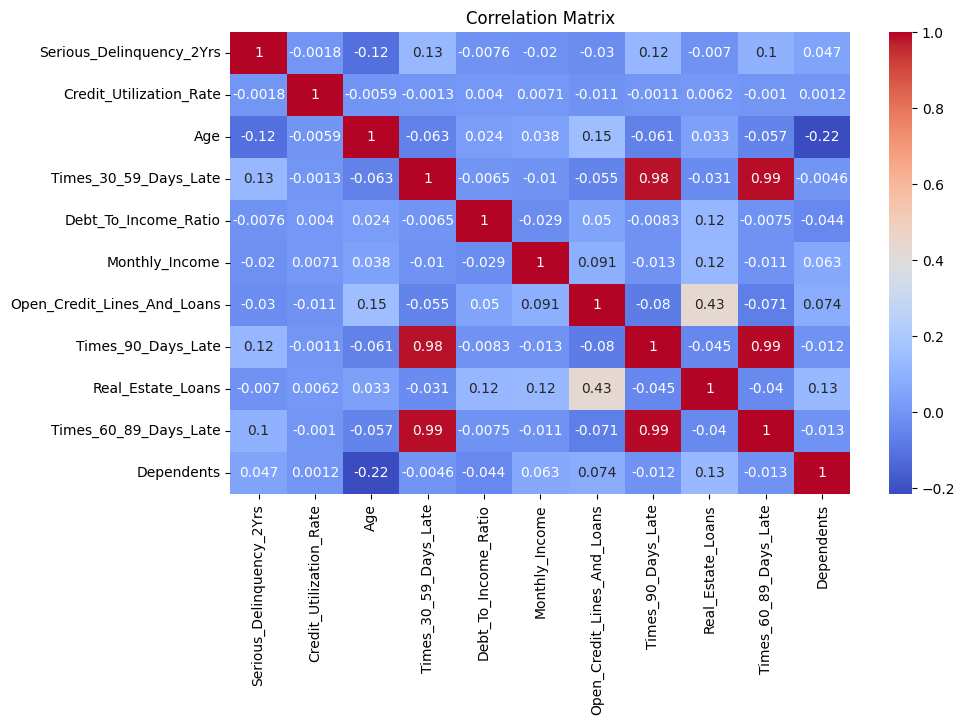

In [18]:
plt.figure(figsize=(10,6))
sns.heatmap(corr, annot = True, cmap='coolwarm')
plt.title('Correlation Matrix')
plt.show()

Taking into account the above outlined correlation matrix I have decided to use the variables which have the highest correlational values.
It means the following:
- Times_30_59_Days_Late
- Times_90_Days_Late
- Times_60_89_Days_Late
- Age

Next, it is a function to get a quick statistical analysis of the variables chosen for the ML model.

Analysis of column: Times_30_59_Days_Late

Descriptive Statistics:
count    150000.000000
mean          0.421033
std           4.192781
min           0.000000
25%           0.000000
50%           0.000000
75%           0.000000
max          98.000000
Name: Times_30_59_Days_Late, dtype: float64

Value Counts:
Times_30_59_Days_Late
0     126018
1      16033
2       4598
3       1754
4        747
5        342
98       264
6        140
7         54
8         25
9         12
96         5
10         4
12         2
13         1
11         1
Name: count, dtype: int64


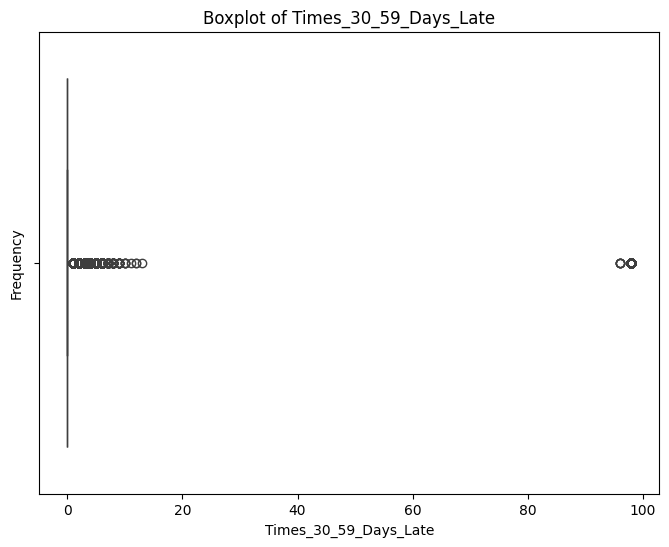

In [19]:
def analyze_variable(df, column_name):
    """
    Analyzes a numerical variable, displaying descriptive statistics,
    value counts, and a boxplot.

    Args:
        df: The Pandas DataFrame.
        column_name: The name of the column to analyze (string).
    """

    print(f"Analysis of column: {column_name}")

    # Descriptive Statistics
    print("\nDescriptive Statistics:")
    print(df[column_name].describe())

    # Value Counts (for discrete or categorical-like numerical)
    print("\nValue Counts:")
    print(df[column_name].value_counts())

    # Boxplot
    plt.figure(figsize=(8, 6))  
    sns.boxplot(x=df[column_name])
    plt.title(f'Boxplot of {column_name}')
    plt.xlabel(column_name)
    plt.ylabel('Frequency')  
    plt.show()


# Example usage:
analyze_variable(df, 'Times_30_59_Days_Late')  


Analysis of column: Times_90_Days_Late

Descriptive Statistics:
count    150000.000000
mean          0.265973
std           4.169304
min           0.000000
25%           0.000000
50%           0.000000
75%           0.000000
max          98.000000
Name: Times_90_Days_Late, dtype: float64

Value Counts:
Times_90_Days_Late
0     141662
1       5243
2       1555
3        667
4        291
98       264
5        131
6         80
7         38
8         21
9         19
10         8
96         5
11         5
13         4
15         2
14         2
12         2
17         1
Name: count, dtype: int64


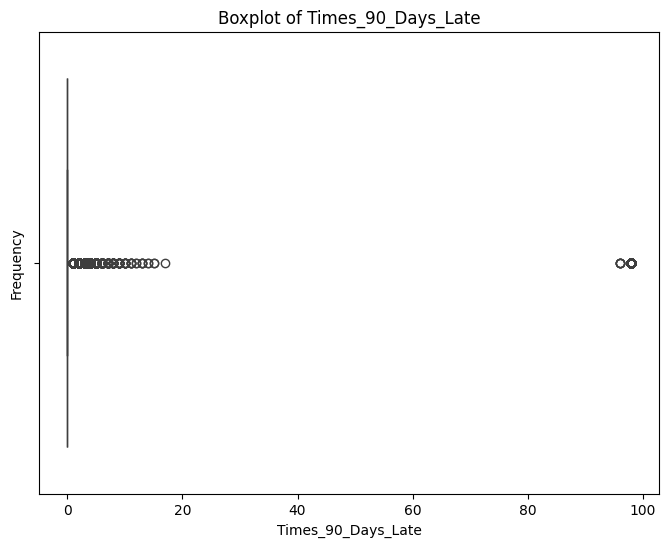

In [20]:
analyze_variable(df, 'Times_90_Days_Late')

Analysis of column: Times_60_89_Days_Late

Descriptive Statistics:
count    150000.000000
mean          0.240387
std           4.155179
min           0.000000
25%           0.000000
50%           0.000000
75%           0.000000
max          98.000000
Name: Times_60_89_Days_Late, dtype: float64

Value Counts:
Times_60_89_Days_Late
0     142396
1       5731
2       1118
3        318
98       264
4        105
5         34
6         16
7          9
96         5
8          2
11         1
9          1
Name: count, dtype: int64


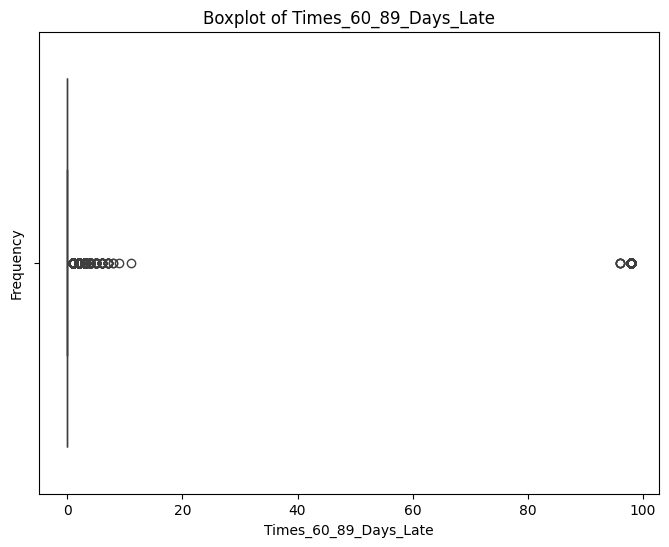

In [21]:
analyze_variable(df, 'Times_60_89_Days_Late')

Analysis of column: Age

Descriptive Statistics:
count    150000.000000
mean         52.295207
std          14.771866
min           0.000000
25%          41.000000
50%          52.000000
75%          63.000000
max         109.000000
Name: Age, dtype: float64

Value Counts:
Age
49     3837
48     3806
50     3753
47     3719
63     3719
       ... 
102       3
109       2
107       1
105       1
0         1
Name: count, Length: 86, dtype: int64


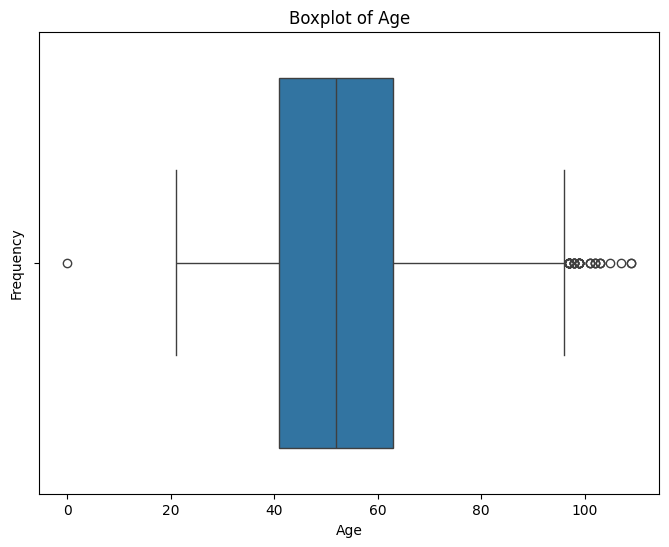

In [22]:
analyze_variable(df, 'Age')

### As a conclusion I have decided to normalize those variables since the range between the min and max value is considerably huge.

As next step I will look through the target value.

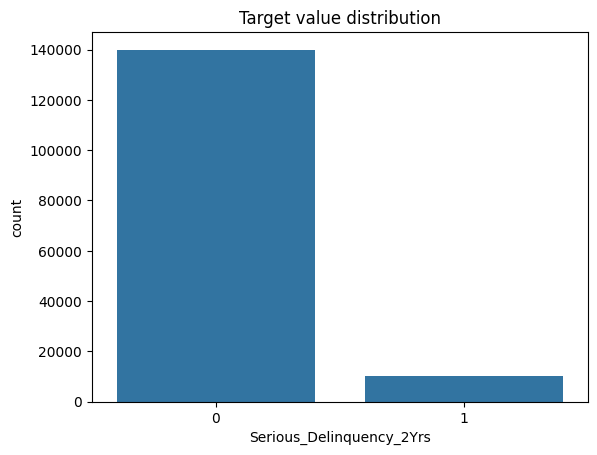

In [23]:
# target value distribution
sns.countplot(x="Serious_Delinquency_2Yrs", data=df)
plt.title("Target value distribution")
plt.show()

In [24]:
df['Serious_Delinquency_2Yrs'].value_counts()

Serious_Delinquency_2Yrs
0    139974
1     10026
Name: count, dtype: int64

In [25]:
df.columns

Index(['Serious_Delinquency_2Yrs', 'Credit_Utilization_Rate', 'Age',
       'Times_30_59_Days_Late', 'Debt_To_Income_Ratio', 'Monthly_Income',
       'Open_Credit_Lines_And_Loans', 'Times_90_Days_Late',
       'Real_Estate_Loans', 'Times_60_89_Days_Late', 'Dependents'],
      dtype='object')

It is seen a visible classes disbalance. Since this, I will use SMOTE to do a rebalancing.

### Data Split

In [37]:
# Independent variables are chosen (X) and a target value (y)
X = df[["Times_30_59_Days_Late", "Times_90_Days_Late", "Times_60_89_Days_Late", "Age"]]
y = df["Serious_Delinquency_2Yrs"]

# Training and Test data split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42, stratify=y)

### Variables Scaling

In [38]:
# Scaling the variables
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

### Undersampling

In [39]:
undersampler = RandomUnderSampler(sampling_strategy='auto', random_state=42)  # auto balance the classes
X_train_res, y_train_res = undersampler.fit_resample(X_train_scaled, y_train)

# Check class distribution after undersampling
print("Class distribution after undersampling:")
print(pd.Series(y_train_res).value_counts())

Class distribution after undersampling:
Serious_Delinquency_2Yrs
0    8021
1    8021
Name: count, dtype: int64


### Random Forest (undersampling)


Let's do a grid search to find the most optimal parameters for the model.

In [40]:
model = RandomForestClassifier(random_state=42, class_weight='balanced')

# Hyperparametrs search
param_grid = {
    'n_estimators': [100, 200, 300],  # Número de árboles
    'max_depth': [15, 20],  # Profundidad máxima del árbol
    'min_samples_leaf': [1, 2],  # Mínimo de muestras por hoja
}

# Grid Search set with cross validation
grid_search = GridSearchCV(
    estimator=model,
    param_grid=param_grid,
    cv=5,  # 5-fold cross-validation
    scoring='roc_auc',  
    n_jobs=-1,  
)

# Entrenar el modelo con Grid Search
grid_search.fit(X_train_scaled, y_train)



GridSearchCV(cv=5,
             estimator=RandomForestClassifier(class_weight='balanced',
                                              random_state=42),
             n_jobs=-1,
             param_grid={'max_depth': [15, 20], 'min_samples_leaf': [1, 2],
                         'n_estimators': [100, 200, 300]},
             scoring='roc_auc')

In [41]:
# Mostrar los mejores parámetros y el mejor puntaje
print("Mejores parámetros encontrados:", grid_search.best_params_)
print("Mejor puntaje de AUC-ROC:", grid_search.best_score_)

# Obtener el mejor modelo
best_model = grid_search.best_estimator_

Mejores parámetros encontrados: {'max_depth': 15, 'min_samples_leaf': 2, 'n_estimators': 300}
Mejor puntaje de AUC-ROC: 0.7902279187395795


In [42]:
model = RandomForestClassifier(
    random_state=42,
    class_weight='balanced',  # Balanced weight for each class in the subsample
    max_depth=15,                     
    min_samples_leaf=2,                 
    n_estimators=300                    
)

# Train the model
model.fit(X_train_res, y_train_res)

# Predicting the testing set
y_pred = model.predict(X_test_scaled)

# Model Evaluation
print("Classification Report:")
print(classification_report(y_test, y_pred, zero_division=0))
print("ROC-AUC Score in the test set:", roc_auc_score(y_test, model.predict_proba(X_test_scaled)[:, 1]))

Classification Report:
              precision    recall  f1-score   support

           0       0.97      0.85      0.91     27995
           1       0.24      0.66      0.35      2005

    accuracy                           0.83     30000
   macro avg       0.60      0.75      0.63     30000
weighted avg       0.92      0.83      0.87     30000

ROC-AUC Score in the test set: 0.8133778520300429


I will increase the number of X features to see if it is possible to enhance the model's performance.

In [44]:
x_1 = df.drop(columns=['Serious_Delinquency_2Yrs'])
y_1 = df['Serious_Delinquency_2Yrs']

In [46]:
# Training and Test data split
X_train_1, X_test_1, y_train_1, y_test_1 = train_test_split(x_1, y_1, test_size=0.2, random_state=42, stratify=y)

In [48]:
model = RandomForestClassifier(
    random_state=42,
    class_weight='balanced',  # Balanced weight for each class in the subsample
    max_depth=15,                     
    min_samples_leaf=2,                 
    n_estimators=300                    
)

# Train the model
model.fit(X_train_1, y_train_1)

# Predicting the testing set
y_pred_1 = model.predict(X_test_1)

# Model Evaluation
print("Classification Report:")
print(classification_report(y_test_1, y_pred_1, zero_division=0))
print("ROC-AUC Score in the test set:", roc_auc_score(y_test_1, model.predict_proba(X_test_1)[:, 1]))

Classification Report:
              precision    recall  f1-score   support

           0       0.97      0.91      0.94     27995
           1       0.30      0.56      0.39      2005

    accuracy                           0.88     30000
   macro avg       0.63      0.73      0.66     30000
weighted avg       0.92      0.88      0.90     30000

ROC-AUC Score in the test set: 0.8535595285763089


The metrics have improved. Let's if it's possible to get still a better performance by scaling the variables.

### Scaling #2

In [50]:
scaler = StandardScaler()
X_train_scaled_1 = scaler.fit_transform(X_train_1)
X_test_scaled_1 = scaler.transform(X_test_1)

In [51]:
model = RandomForestClassifier(
    random_state=42,
    class_weight='balanced',  # Balanced weight for each class in the subsample
    max_depth=15,                     
    min_samples_leaf=2,                 
    n_estimators=300                    
)

# Train the model
model.fit(X_train_scaled_1, y_train_1)

# Predicting the testing set
y_pred_1 = model.predict(X_test_scaled_1)

# Model Evaluation
print("Classification Report:")
print(classification_report(y_test_1, y_pred_1, zero_division=0))
print("ROC-AUC Score in the test set:", roc_auc_score(y_test_1, model.predict_proba(X_test_scaled_1)[:, 1]))

Classification Report:
              precision    recall  f1-score   support

           0       0.97      0.91      0.94     27995
           1       0.30      0.55      0.39      2005

    accuracy                           0.88     30000
   macro avg       0.63      0.73      0.66     30000
weighted avg       0.92      0.88      0.90     30000

ROC-AUC Score in the test set: 0.8527933425945764


The model got a slightly worse performance.

Let's see another ML model which is pretty suitable for credit scoring projects.

### CATBOOST

In [52]:
from catboost import CatBoostClassifier, Pool
from sklearn.model_selection import train_test_split
from sklearn.model_selection import GridSearchCV

X_train, X_valid, y_train, y_valid = train_test_split(x_1, y_1, test_size=0.33, random_state=42, stratify=y)
train_pool = Pool(X_train, y_train)
valid_pool = Pool(X_valid, y_valid)

In [53]:
parameters = {'depth'         : [4,5,6],
                 'learning_rate' : [0.01,0.05],
                  'iterations'    : [150, 175, 180],
                  'eval_metric': ['AUC:hints=skip_train~false'],
                 }

In [54]:
model  =  CatBoostClassifier()
Grid_CBC = GridSearchCV(estimator = model, param_grid = parameters, cv = 4, n_jobs=-1)
Grid_CBC.fit(X_train, y_train)
print('done')

0:	learn: 0.8089861	total: 34.1ms	remaining: 5.08s
1:	learn: 0.8311629	total: 65.5ms	remaining: 4.85s
2:	learn: 0.8348897	total: 92.3ms	remaining: 4.52s
3:	learn: 0.8358278	total: 118ms	remaining: 4.31s
4:	learn: 0.8420092	total: 143ms	remaining: 4.14s
5:	learn: 0.8485406	total: 171ms	remaining: 4.09s
6:	learn: 0.8534242	total: 196ms	remaining: 4s
7:	learn: 0.8536686	total: 223ms	remaining: 3.96s
8:	learn: 0.8536699	total: 257ms	remaining: 4.03s
9:	learn: 0.8538977	total: 290ms	remaining: 4.06s
10:	learn: 0.8536333	total: 353ms	remaining: 4.46s
11:	learn: 0.8542707	total: 403ms	remaining: 4.63s
12:	learn: 0.8540470	total: 429ms	remaining: 4.52s
13:	learn: 0.8538617	total: 458ms	remaining: 4.45s
14:	learn: 0.8539805	total: 493ms	remaining: 4.44s
15:	learn: 0.8561174	total: 532ms	remaining: 4.46s
16:	learn: 0.8557476	total: 561ms	remaining: 4.39s
17:	learn: 0.8561788	total: 591ms	remaining: 4.33s
18:	learn: 0.8564647	total: 619ms	remaining: 4.26s
19:	learn: 0.8564279	total: 657ms	remaini

In [55]:
print(" Results from Grid Search " )
print("\n The best estimator across ALL searched params:\n",Grid_CBC.best_estimator_)
print("\n The best score across ALL searched params:\n",Grid_CBC.best_score_)
print("\n The best parameters across ALL searched params:\n",Grid_CBC.best_params_)

 Results from Grid Search 

 The best estimator across ALL searched params:

 The best score across ALL searched params:
 0.9374626865671642

 The best parameters across ALL searched params:
 {'depth': 5, 'eval_metric': 'AUC:hints=skip_train~false', 'iterations': 150, 'learning_rate': 0.05}


In [ ]:
# Model with the best found parameters
model_cat = Grid_CBC.best_estimator_

# Training phase
model_cat.fit(X_train, y_train)

# Predictions
y_pred = model_cat.predict(X_valid)

# Model evaluation
print("Classification Report:\n", classification_report(y_valid, y_pred))

# Calculatin ROC-AUC model score
y_pred_proba = model_cat.predict_proba(X_valid)[:, 1]  # Probabilidad de la clase positiva
roc_auc = roc_auc_score(y_valid, y_pred_proba)
print("ROC-AUC Score:", roc_auc)


0:	learn: 0.8089861	total: 80.8ms	remaining: 12s
1:	learn: 0.8311629	total: 109ms	remaining: 8.04s
2:	learn: 0.8348897	total: 132ms	remaining: 6.49s
3:	learn: 0.8358278	total: 163ms	remaining: 5.96s
4:	learn: 0.8420092	total: 202ms	remaining: 5.85s
5:	learn: 0.8485406	total: 237ms	remaining: 5.68s
6:	learn: 0.8534242	total: 273ms	remaining: 5.58s
7:	learn: 0.8536686	total: 312ms	remaining: 5.54s
8:	learn: 0.8536699	total: 361ms	remaining: 5.66s
9:	learn: 0.8538977	total: 388ms	remaining: 5.44s
10:	learn: 0.8536333	total: 418ms	remaining: 5.28s
11:	learn: 0.8542707	total: 456ms	remaining: 5.25s
12:	learn: 0.8540470	total: 493ms	remaining: 5.2s
13:	learn: 0.8538617	total: 592ms	remaining: 5.75s
14:	learn: 0.8539805	total: 630ms	remaining: 5.67s
15:	learn: 0.8561174	total: 669ms	remaining: 5.61s
16:	learn: 0.8557476	total: 733ms	remaining: 5.73s
17:	learn: 0.8561788	total: 777ms	remaining: 5.69s
18:	learn: 0.8564647	total: 819ms	remaining: 5.64s
19:	learn: 0.8564279	total: 860ms	remaining

Finally, we got a model with the a 0.86 ROC-AUC score. The best metric we could get.

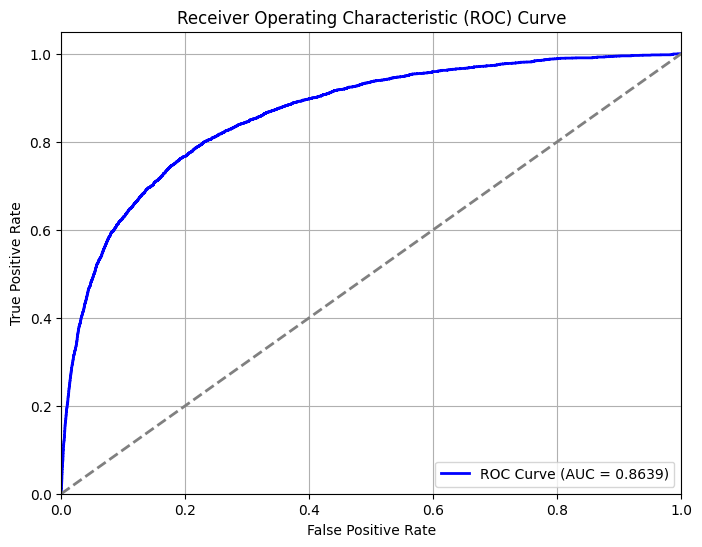

In [60]:
# ROC curve
fpr, tpr, _ = roc_curve(y_valid, y_pred_proba)  # fpr = false positive rate, tpr = true positive rate
roc_auc = auc(fpr, tpr)  # AUC

# Graficar la curva ROC
plt.figure(figsize=(8, 6))
plt.plot(fpr, tpr, color='blue', lw=2, label=f'ROC Curve (AUC = {roc_auc:.4f})')
plt.plot([0, 1], [0, 1], color='gray', linestyle='--', lw=2)  

# Configuración del gráfico
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC) Curve')
plt.legend(loc="lower right")
plt.grid()
plt.show()

### TEST PHASE

Let's test the model with the test set.

In [70]:
test_df = pd.read_csv(r'cs-test.csv')

In [71]:
test_df.head()

,Unnamed: 0,SeriousDlqin2yrs,RevolvingUtilizationOfUnsecuredLines,age,NumberOfTime30-59DaysPastDueNotWorse,DebtRatio,MonthlyIncome,NumberOfOpenCreditLinesAndLoans,NumberOfTimes90DaysLate,NumberRealEstateLoansOrLines,NumberOfTime60-89DaysPastDueNotWorse,NumberOfDependents
0,1,NaN,0.885519,43,0,0.177513,5700.0,4,0,0,0,0.0
1,2,NaN,0.463295,57,0,0.527237,9141.0,15,0,4,0,2.0
2,3,NaN,0.043275,59,0,0.687648,5083.0,12,0,1,0,2.0
3,4,NaN,0.280308,38,1,0.925961,3200.0,7,0,2,0,0.0
4,5,NaN,1.000000,27,0,0.019917,3865.0,4,0,0,0,1.0


In [72]:
test_df.drop(columns=['Unnamed: 0'], inplace = True)

In [73]:
test_df.rename(columns={
    'SeriousDlqin2yrs': 'Serious_Delinquency_2Yrs',
    'RevolvingUtilizationOfUnsecuredLines': 'Credit_Utilization_Rate',
    'age': 'Age',
    'NumberOfTime30-59DaysPastDueNotWorse': 'Times_30_59_Days_Late',
    'DebtRatio': 'Debt_To_Income_Ratio',
    'MonthlyIncome': 'Monthly_Income',
    'NumberOfOpenCreditLinesAndLoans': 'Open_Credit_Lines_And_Loans',
    'NumberOfTimes90DaysLate': 'Times_90_Days_Late',
    'NumberRealEstateLoansOrLines': 'Real_Estate_Loans',
    'NumberOfTime60-89DaysPastDueNotWorse': 'Times_60_89_Days_Late',
    'NumberOfDependents': 'Dependents'
}, inplace=True)

In [74]:
X_test = test_df.drop(columns=['Serious_Delinquency_2Yrs'])

In [75]:
X_test = X_test.fillna(X_test.median())

In [76]:
pred = model_cat.predict_proba(X_test)

In [77]:
pred

array([[0.93384413, 0.06615587],
       [0.94704641, 0.05295359],
       [0.98207313, 0.01792687],
       ...,
       [0.98566329, 0.01433671],
       [0.88095229, 0.11904771],
       [0.95827889, 0.04172111]])

In [82]:
p_class0 = pred[:, 0]

# Establecer el umbral para la clase 0 (por ejemplo, 0.8)
umbral = 0.8

# Clasificar: si la probabilidad de clase 0 es mayor o igual al umbral, asignamos la clase 0; de lo contrario, la clase 1.
y_pred_final =(p_class0 >= umbral).astype(int)

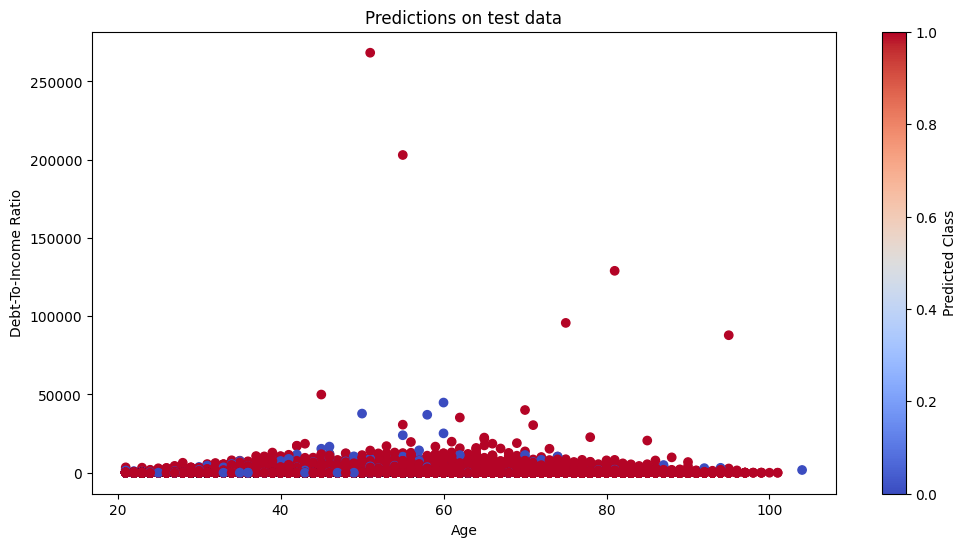

In [83]:
plt.figure(figsize=(12, 6))
plt.scatter(X_test['Age'], X_test['Debt_To_Income_Ratio'], c=y_pred_final, cmap='coolwarm')
plt.title('Predictions on test data')
plt.xlabel('Age')
plt.ylabel('Debt-To-Income Ratio')
plt.colorbar(label='Predicted Class')
plt.show()

## Score for clients

In [ ]:
# Getting the class 0 probability (no risk) )
p_no_risk = model_cat.predict_proba(X_test)[:, 0] 

# Calculaating the odds for Class 0
# A small constant is added to avoid 0 division errors
odds_no_risk = p_no_risk / (1 - p_no_risk + 1e-8)

# Parameters for scroing
A = 600  # Base Score 
B = 50   # Scaling Factor

# Score calculation: scores = A - B * ln(odds)
scores = A - B * np.log(odds_no_risk)

# Showing some scores
print("Scores for the first 10 clients:")
print(scores[:10])

Scores for the first 10 clients:
[467.63521499 455.80340274 399.83176795 471.25757229 490.51376098
 426.48167951 451.45502683 423.92685938 385.87125662 578.35213836]


Now, I will save the trained model for later deployment.

In [86]:
import joblib
joblib.dump(model_cat, 'model_cat.pkl')

['model_cat.pkl']